### Product

Analyzing wherether or not `product_weight`, `product_size`, `product_category` have impact on delivery time.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from utils import read_product_delivery

In [20]:
df = read_product_delivery()
df.head()

,order_id,product_id,quantity,seller_id,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,13.29,cool_stuff,650.0,28.0,9.0,14.0,2017-09-13 08:59:02,6 days 09:35:14,1 days 05:09:32,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,19.93,pet_shop,30000.0,50.0,30.0,40.0,2017-04-26 10:53:06,8 days 03:41:54,8 days 01:29:24,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,2018-01-14 14:33:31,1 days 22:03:17,6 days 00:42:28,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,12.79,perfumaria,200.0,16.0,10.0,15.0,2018-08-08 10:00:35,2 days 03:27:25,4 days 00:04:39,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,2017-02-04 13:57:51,11 days 19:48:18,13 days 06:56:22,25 days 02:44:40


In [21]:
df['total_days'] = df['total_delivery_time'].dt.days

#### Correlation (Weight, Size)

In [22]:
cols = ['quantity', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'freight_value']
df[cols].corr()

,quantity,product_weight_g,product_length_cm,product_height_cm,product_width_cm,freight_value
quantity,1.000000,-0.000399,0.005420,0.020930,-0.006260,-0.016030
product_weight_g,-0.000399,1.000000,0.464908,0.581119,0.512478,0.611296
product_length_cm,0.005420,0.464908,1.000000,0.193872,0.551554,0.311360
product_height_cm,0.020930,0.581119,0.193872,1.000000,0.286677,0.389843
product_width_cm,-0.006260,0.512478,0.551554,0.286677,1.000000,0.326472
freight_value,-0.016030,0.611296,0.311360,0.389843,0.326472,1.000000


#### Finding 
`product_weight` has a weak correlation but `freight_value` has a significant one. 

Distance or Carrier Type is more important than the physical weight of the item.

#### Comparing Performance between Weight Category

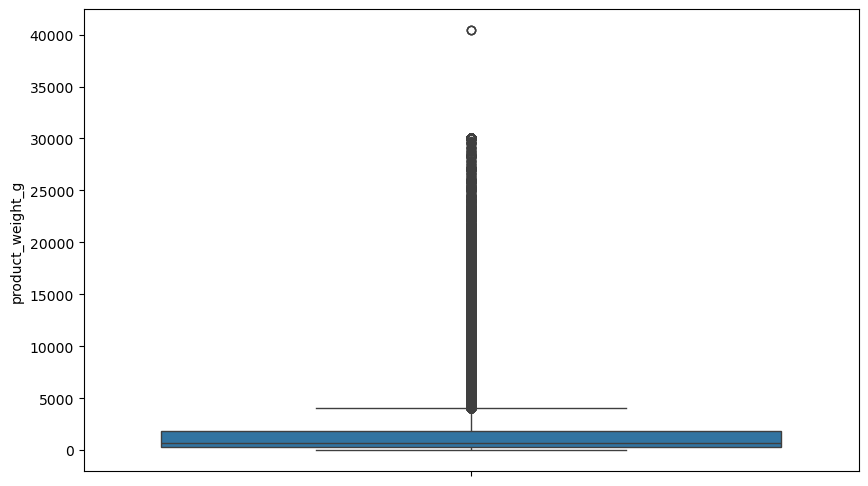

In [12]:
fig, ax = plt.subplots(figsize=(10, 6)) #

sns.boxplot(y='product_weight_g', data=df, ax = ax)
plt.show()

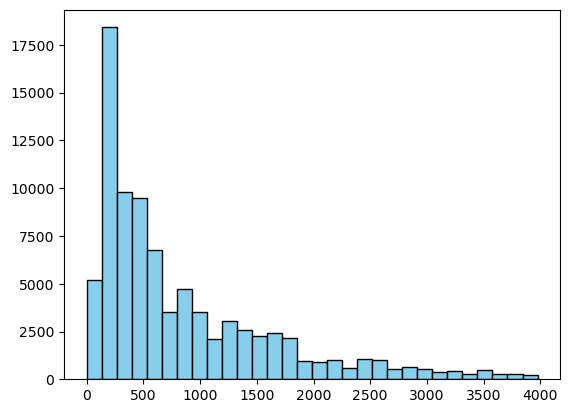

In [13]:
"""
Finding the distribution of product weight
to define the weight category
"""
condition = df['product_weight_g'] < 4000
plt.hist(df[condition]['product_weight_g'] , bins=30, color='skyblue', edgecolor='black')
plt.show()

In [40]:
"""
Group products into 3 weight groups
"""
# Define conditions
conditions = [
    (df['product_weight_g'] >= 5000),
    (df['product_weight_g'] >= 1000),
]

# Define corresponding choices
choices = ['Heavy', 'Medium']

# Use numpy.select to create the new column
df['weight_category'] = np.select(conditions, choices, default='Light')
df.head()

,order_id,product_id,quantity,seller_id,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time,total_days,weight_category,total_days_copy
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,13.29,cool_stuff,650.0,28.0,9.0,14.0,2017-09-13 08:59:02,6 days 09:35:14,1 days 05:09:32,7 days 14:44:46,7,Light,7
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,19.93,pet_shop,30000.0,50.0,30.0,40.0,2017-04-26 10:53:06,8 days 03:41:54,8 days 01:29:24,16 days 05:11:18,16,Heavy,16
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,2018-01-14 14:33:31,1 days 22:03:17,6 days 00:42:28,7 days 22:45:45,7,Medium,7
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,12.79,perfumaria,200.0,16.0,10.0,15.0,2018-08-08 10:00:35,2 days 03:27:25,4 days 00:04:39,6 days 03:32:04,6,Light,6
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,2017-02-04 13:57:51,11 days 19:48:18,13 days 06:56:22,25 days 02:44:40,25,Medium,25


In [41]:
"""
First, group by category and calculate the "Big Three" metrics: 
    Mean (Average), 
    Median (Middle ground, resistant to outliers), 
    and Standard Deviation (Consistency).
"""
df['total_days_copy'] = df['total_days']

gp = df.groupby(['product_category_name']).agg({
            'total_days': 'mean',
            'total_days_copy': 'std',
            'order_id': 'nunique',
            'weight_category': 'first',
        }).reset_index()
gp.columns = ['category', 'delivery_mean', 'delivery_std', 'total_order', 'weight_category']

"""
Focus only on categories with enough data (e.g., more than 30 orders)
"""
gp = gp[gp['total_order'] > 30]


"""
add coefficient of variation
"""
gp['delivery_cv'] = gp['delivery_std'] / gp['delivery_mean']

gp.head(5)

,category,delivery_mean,delivery_std,total_order,weight_category,delivery_cv
0,agro_industria_e_comercio,11.028090,8.018643,177,Medium,0.727111
1,alimentos,9.368778,11.317605,439,Light,1.208013
2,alimentos_bebidas,10.334802,8.068993,221,Medium,0.780759
3,artes,10.774359,6.776274,195,Medium,0.628926
5,artigos_de_festas,8.578947,5.485271,38,Light,0.639387


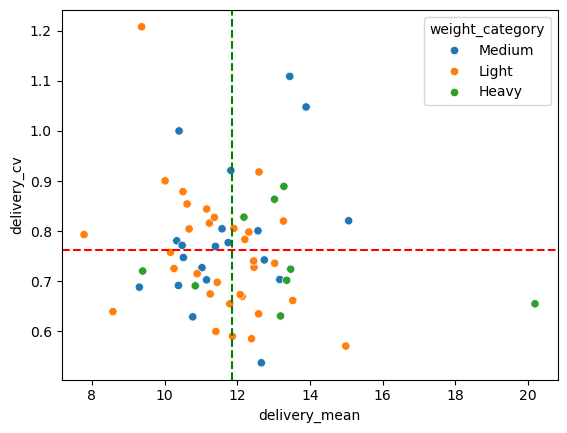

In [42]:
# Create a scatter plot
sns.scatterplot(data=gp, x="delivery_mean", y="delivery_cv", hue="weight_category")

y_mean = gp['delivery_cv'].mean()
x_mean = gp['delivery_mean'].mean()

# Add horizontal line at the mean of y
plt.axhline(y=y_mean, color='r', linestyle='--')

# Add vertical line at the mean of x
plt.axvline(x=x_mean, color='g', linestyle='--')

# Display the plot
plt.show()

#### Finding 

All product categories have a CV above 0.5 , which means the entire company is operating in a high-variance state. 

An analysis of `4 weight_categories` shows an equal distribution across the performance quadrants. This indicates that delivery delays are not tied to `product_weight` but are instead driven by operational bottlenecks